<a href="https://colab.research.google.com/github/BeyzaNurYildirim81/Market_Sepet_Analizi/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive ile bağlantı kurdum.

In [34]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
from IPython.display import Image # Resim eklemek için koymus bende gerek yok sanki
import matplotlib.pyplot as plt

Veri setini koda çekiyorum.

In [36]:
hamveri=pd.read_csv("/content/drive/MyDrive/Stajgorev1/retail_dataset.csv",sep=",")

In [37]:
hamveri.shape

(315, 7)

In [38]:
hamveri.head()

,0,1,2,3,4,5,6
0,Ekmek,Kola,Yumurta,Kiyma,Peynir,Kalem,Bebek Bezi
1,Ekmek,Peynir,Kiyma,Bebek Bezi,Kola,Sut,Kalem
2,Peynir,Kiyma,Yumurta,Sut,Kola,NaN,NaN
3,Peynir,Kiyma,Yumurta,Sut,Kola,NaN,NaN
4,Kiyma,Kalem,Kola,NaN,NaN,NaN,NaN


In [39]:
kolon_adlari=(hamveri["0"].unique())
kolon_adlari

array(['Ekmek', 'Peynir', 'Kiyma', 'Yumurta', 'Kola', 'Makarna', 'Kalem',
       'Bebek Bezi', 'Sut'], dtype=object)

In [40]:
hamveri.isna().sum()

0      0
1     30
2     70
3    128
4    182
5    244
6    274
dtype: int64

In [41]:
encoded_vals=[]
for index,row in hamveri.iterrows():
  labels={}
  uncommons=list(set(kolon_adlari) - set(row))
  commons=list(set(kolon_adlari).intersection(row))
  for uc in uncommons:
    labels[uc]=0
  for com in commons:
    labels[com]=1
  encoded_vals.append(labels)

In [42]:
ohe_hamveri=pd.DataFrame(encoded_vals)
ohe_hamveri

,Sut,Makarna,Kola,Kiyma,Bebek Bezi,Peynir,Kalem,Ekmek,Yumurta
0,0,0,1,1,1,1,1,1,1
1,1,0,1,1,1,1,1,1,0
2,1,0,1,1,0,1,0,0,1
3,1,0,1,1,0,1,0,0,1
4,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,0,1,0,1,1
311,1,0,0,1,0,0,1,0,0
312,0,0,1,1,1,1,1,1,1
313,0,0,0,1,0,1,0,0,0


Müşterilerin "yumurta" adlı ürünü kaç kere aldığını görelim.

In [43]:
ohe_hamveri['Yumurta'][ohe_hamveri['Yumurta']>0].sum()

138

In [44]:
miktar=ohe_hamveri[kolon_adlari][ohe_hamveri[kolon_adlari]>0].sum()

In [45]:
miktar

Ekmek         159.0
Peynir        158.0
Kiyma         150.0
Yumurta       138.0
Kola          138.0
Makarna       134.0
Kalem         114.0
Bebek Bezi    128.0
Sut           158.0
dtype: float64

In [46]:
miktar=pd.DataFrame(miktar,dtype=int)
miktar.columns=["Miktar"]
miktar

,Miktar
Ekmek,159
Peynir,158
Kiyma,150
Yumurta,138
Kola,138
Makarna,134
Kalem,114
Bebek Bezi,128
Sut,158


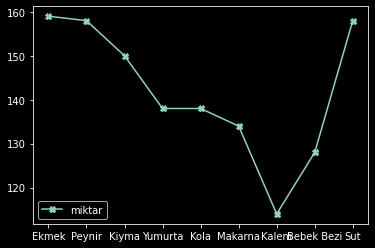

In [47]:
plt.style.use('dark_background')
plt.plot(miktar, label = 'miktar',marker = 'X')
plt.legend()

Apriori uygulaması adımları
- her ürünün frekansı(tekrar sayısı bulunur)
-support değeri hesaplanır

In [48]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ögeler arası birliktelik destek ve güven değerleri ile hesaplanır.
Destek ögeler arası bağıntının ne kadar sık olduğunu gösterir.
X ürününün destek değeri, tüm alışverişler içinde X'in oranıdır.
Destek X= X/ toplam alışveriş eder.
İki veya daha fazla ürünün desteği örn. destek (x,y)=x,y sayısı/ toplam alışveriş

Minimum destek değerini hesaplıyorum.

In [49]:
from re import VERBOSE
from mlxtend.frequent_patterns import apriori , association_rules
frekans_degeri=apriori(ohe_hamveri,min_support=0.2,use_colnames=True)#,verbose=1 bu artık desteklenmiyor, amacı ayrıntılı göstermekti

In [50]:
frekans_degeri

,support,itemsets
0,0.501587,(Sut)
1,0.425397,(Makarna)
2,0.438095,(Kola)
3,0.476190,(Kiyma)
4,0.406349,(Bebek Bezi)
5,0.501587,(Peynir)
6,0.361905,(Kalem)
7,0.504762,(Ekmek)
8,0.438095,(Yumurta)
9,0.225397,"(Sut, Makarna)"


In [51]:
# Destek değeri 0.45'ten yüksek olanları göster.
frekans_degeri["itemsets"][frekans_degeri["support"]>0.45]

0       (Sut)
3     (Kiyma)
5    (Peynir)
7     (Ekmek)
Name: itemsets, dtype: object

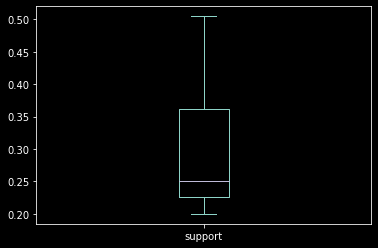

In [52]:
# Tek veya birlikte ürün kombinasyonları ortalama 0.25 destek değerine sahip.
frekans_degeri["support"].plot.box()

Güven(confidence) kriteri ise Y ürününün hangi sıklıkla X ile beraber olduğunu gösterir.Güven(X,Y)=x,y sayısı/ x'i içeren her alışveriş sayısı

In [53]:
solve = association_rules(frekans_degeri, metric = "confidence", min_threshold = 0.6)
solve

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Peynir),(Sut),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Sut),(Peynir),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Makarna),(Ekmek),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
3,(Kola),(Peynir),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
4,(Kiyma),(Peynir),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
5,(Peynir),(Kiyma),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
6,(Yumurta),(Kiyma),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
7,(Yumurta),(Peynir),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
8,"(Kiyma, Peynir)",(Sut),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
9,"(Kiyma, Sut)",(Peynir),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137


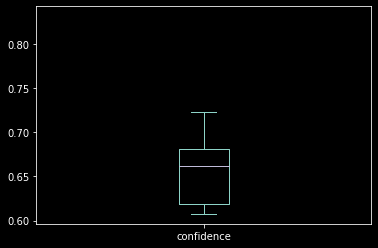

In [54]:
solve["confidence"].plot.box()

In [55]:
solve[solve["confidence"]>0.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,"(Kiyma, Sut)",(Peynir),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
12,"(Kiyma, Yumurta)",(Peynir),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667


In [56]:
uyum_degerleri=pd.DataFrame(solve[['antecedents', 'consequents', 'support', 'confidence']])
uyum_degerleri

,antecedents,consequents,support,confidence
0,(Peynir),(Sut),0.304762,0.607595
1,(Sut),(Peynir),0.304762,0.607595
2,(Makarna),(Ekmek),0.279365,0.656716
3,(Kola),(Peynir),0.269841,0.615942
4,(Kiyma),(Peynir),0.323810,0.680000
5,(Peynir),(Kiyma),0.323810,0.645570
6,(Yumurta),(Kiyma),0.266667,0.608696
7,(Yumurta),(Peynir),0.298413,0.681159
8,"(Kiyma, Peynir)",(Sut),0.203175,0.627451
9,"(Kiyma, Sut)",(Peynir),0.203175,0.831169


In [62]:
##Belirli değerler arasında seçim belirlemek için
pd.DataFrame(solve[(solve["confidence"]>0.6) & (solve["support"]>0.3)])



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Peynir),(Sut),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Sut),(Peynir),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
4,(Kiyma),(Peynir),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
5,(Peynir),(Kiyma),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891


Veri aktarımı için json

In [ ]:
import json

In [ ]:
##Gösterim seçenekleri
# json_split = dataFrame.to_json(orient ='split')
# print("json_split = ", json_split, "\n")
   
# json_records = dataFrame.to_json(orient ='records')
# print("json_records = ", json_records, "\n")
   
# json_index = dataFrame.to_json(orient ='index')
# print("json_index = ", json_index, "\n")
   
# json_columns = dataFrame.to_json(orient ='columns')
# print("json_columns = ", json_columns, "\n")
   
# json_values = dataFrame.to_json(orient ='values')
# print("json_values = ", json_values, "\n")
   
# json_table = dataFrame.to_json(orient ='table')
# print("json_table = ", json_table, "\n")

In [ ]:
 json_split = uyum_degerleri.to_json(orient ='records')
 print("json_split = ", json_split, "\n")

json_split =  [{"antecedents":["Peynir"],"consequents":["Sut"],"support":0.3047619048,"confidence":0.6075949367},{"antecedents":["Sut"],"consequents":["Peynir"],"support":0.3047619048,"confidence":0.6075949367},{"antecedents":["Makarna"],"consequents":["Ekmek"],"support":0.2793650794,"confidence":0.6567164179},{"antecedents":["Kola"],"consequents":["Peynir"],"support":0.2698412698,"confidence":0.615942029},{"antecedents":["Kiyma"],"consequents":["Peynir"],"support":0.3238095238,"confidence":0.68},{"antecedents":["Peynir"],"consequents":["Kiyma"],"support":0.3238095238,"confidence":0.6455696203},{"antecedents":["Yumurta"],"consequents":["Kiyma"],"support":0.2666666667,"confidence":0.6086956522},{"antecedents":["Yumurta"],"consequents":["Peynir"],"support":0.2984126984,"confidence":0.6811594203},{"antecedents":["Kiyma","Peynir"],"consequents":["Sut"],"support":0.2031746032,"confidence":0.6274509804},{"antecedents":["Kiyma","Sut"],"consequents":["Peynir"],"support":0.2031746032,"confidenc

In [ ]:
with open('cikti.json', 'w') as f:
  json.dump(json_split, f, ensure_ascii=False)